In [ ]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))

Saving Breast_Cancer.csv to Breast_Cancer.csv
User uploaded file "Breast_Cancer.csv" with length 125204 bytes


In [ ]:
import pandas as pd
import io
data=pd.read_csv(io.StringIO(uploaded['Breast_Cancer.csv'].decode('utf-8')))
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Benign 357
Malignant 212


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


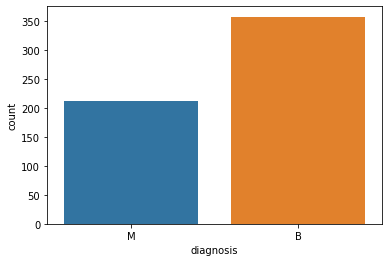

In [ ]:
import seaborn as sns
ax=sns.countplot(data['diagnosis'],label='Count')
B,M=data['diagnosis'].value_counts()
print('Benign',B)
print('Malignant',M)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

del data['Unnamed: 32']

In [ ]:
X=data.iloc[:,2:].values   #independent variables
y=data.iloc[:,1].values   #dependent variable

#ENCODING 

from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()
y=labelencoder_X.fit_transform(y)


#training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=35)

#Faetaure scaling to standardise the value
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [ ]:
X_train

array([[-1.01285845, -0.07821491, -0.94445602, ..., -0.54054972,
         0.06184534, -0.42833044],
       [-0.67169312, -0.62959523, -0.54377419, ...,  1.10140258,
         4.55346544,  1.03590975],
       [-0.25376559, -0.52722926, -0.31434155, ..., -0.27230089,
        -0.62600333, -0.40890079],
       ...,
       [ 0.10445801,  0.01251857,  0.08592763, ..., -0.28516214,
        -0.681475  , -0.4952548 ],
       [ 1.45206106,  1.67131253,  1.47449031, ...,  0.97891453,
         1.22199562,  1.53784244],
       [-0.81668839, -1.45317596, -0.82272467, ..., -0.41438703,
        -0.26622995, -0.19355547]])

In [ ]:
!pip install keras


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#Adding the input and first hidden layer
classifier=Sequential()
classifier.add(Dense(30,activation='relu'))

#Adding the Second Hidden layer
classifier.add(Dense(16,activation='relu'))

#adding the output layer
classifier.add(Dense(1,activation='sigmoid'))



In [ ]:
classifier.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
classifier.fit(X_train,y_train,batch_size=100,epochs=150)

Epoch 1/150
6/6 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.8320
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4653 - accuracy: 0.9219
Epoch 3/150
6/6 [==============================] - 0s 3ms/step - loss: 0.4019 - accuracy: 0.9453
Epoch 4/150
6/6 [==============================] - 0s 3ms/step - loss: 0.3493 - accuracy: 0.9512
Epoch 5/150
6/6 [==============================] - 0s 4ms/step - loss: 0.3057 - accuracy: 0.9570
Epoch 6/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.9551
Epoch 7/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2359 - accuracy: 0.9551
Epoch 8/150
6/6 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9590
Epoch 9/150
6/6 [==============================] - 0s 4ms/step - loss: 0.1880 - accuracy: 0.9590
Epoch 10/150
6/6 [==============================] - 0s 3ms/step - loss: 0.1699 - accuracy: 0.9609
Epoch 11/150
6/6 [===========

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

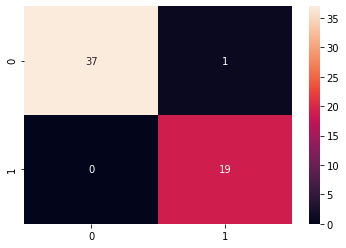

In [ ]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')